# Predict Career Longevity for NBA Rookies



This project to build a binary classification model using Scikit-learn to predict if the NBA rookie will last for 5 years in the league if provided with some information such as Games played, assists, steals and turnovers …. etc. 




In [1]:
import pandas as pd # load and manipulate data 
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression # import Logistic regression from sklearn
#import warnings # import warnings
#import sklearn.metrics as metrics # import metrics 
import seaborn as sns # import seaborn for visualization 
#from sklearn.preprocessing import MinMaxScaler #import min max scaler
from IPython.display import Image # library to import image
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold
#from yellowbrick.classifier import ROCAUC#Discriminationthreshold

In [2]:
#import the dataframe 
df = pd.read_csv('nba_logreg.csv')


In [3]:
#load the dataframe head
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

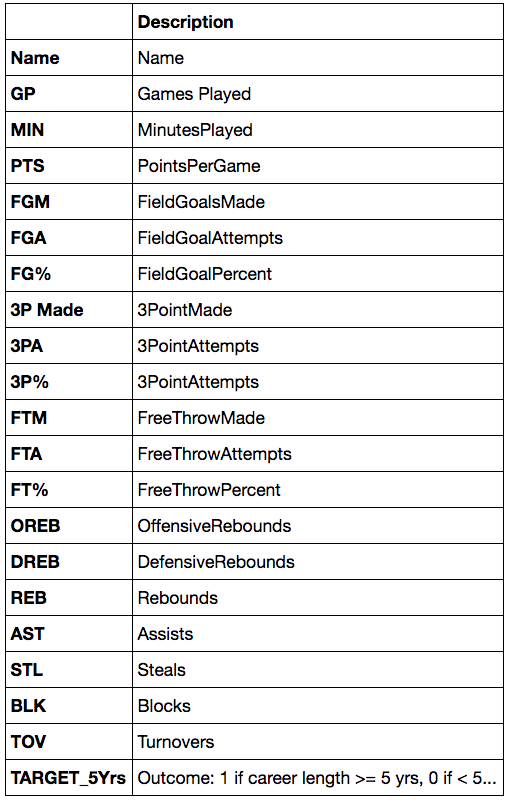

In [5]:
#Import the description table
Image(filename='table.png')

In [6]:
#class imbalance
df['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [7]:
#find null values
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [8]:
# drop null values
df = df.dropna()
df.shape

(1329, 21)

In [9]:
# Adding another column for the label (to use it in the plot)
df['LABEL'] = df['TARGET_5Yrs'].apply(lambda x: 'Lasted for 5 Years' if x == 1 else 'Did not last for 5 years' )

In [10]:
#Group all the observations by (Target_5yrs)
Grouped_df = df.groupby(['LABEL']).mean().drop(['TARGET_5Yrs'],axis=1)

In [11]:
#Test
Grouped_df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
LABEL,,,,,,,,,,,,,,,,,,,
Did not last for 5 years,51.495030,14.276740,5.060636,1.951093,4.562425,42.270775,0.232406,0.763618,19.378131,0.928231,1.324254,69.122266,0.713519,1.522863,2.234592,1.230815,0.500000,0.249901,0.944732
Lasted for 5 Years,65.826877,19.700847,7.891646,3.051090,6.718523,45.242131,0.260169,0.799031,19.265496,1.530872,2.133656,71.189588,1.186683,2.325061,3.511864,1.758838,0.693705,0.436925,1.349031


In [12]:
#Transpose the data frame
Grouped_df = Grouped_df.T
Grouped_df

LABEL,Did not last for 5 years,Lasted for 5 Years
GP,51.495030,65.826877
MIN,14.276740,19.700847
PTS,5.060636,7.891646
FGM,1.951093,3.051090
FGA,4.562425,6.718523
FG%,42.270775,45.242131
3P Made,0.232406,0.260169
3PA,0.763618,0.799031
3P%,19.378131,19.265496
FTM,0.928231,1.530872


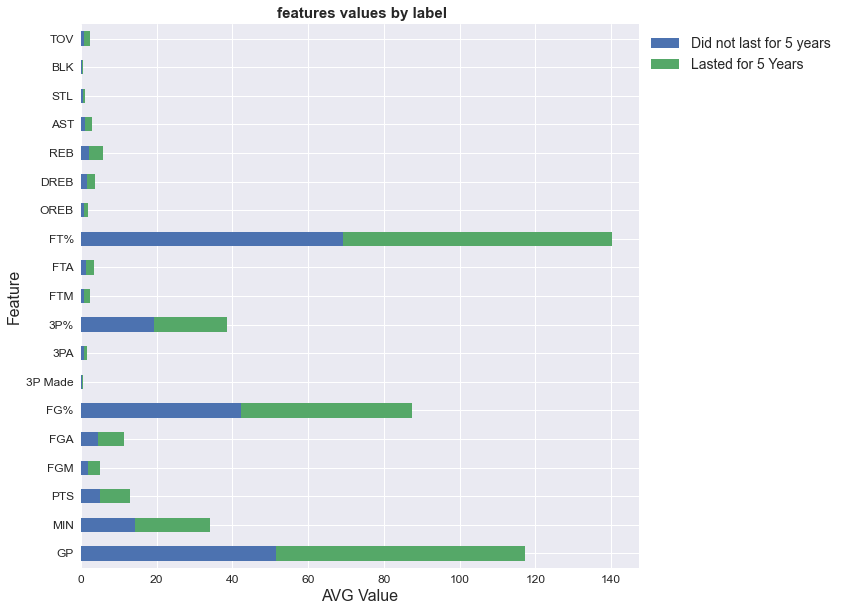

In [13]:
#Visualize the data for insights
plt.style.use('seaborn')
ax = Grouped_df.plot(stacked = True, kind= 'barh', figsize=(10,10))

plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=14)
plt.xlabel('AVG Value',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(' features values by label',fontsize=15,weight='bold');

In [14]:
# Labels and features 
X = df.drop(['Name','TARGET_5Yrs','LABEL'], axis=1)
y = df['TARGET_5Yrs']


In [15]:
#correlation map
X.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762


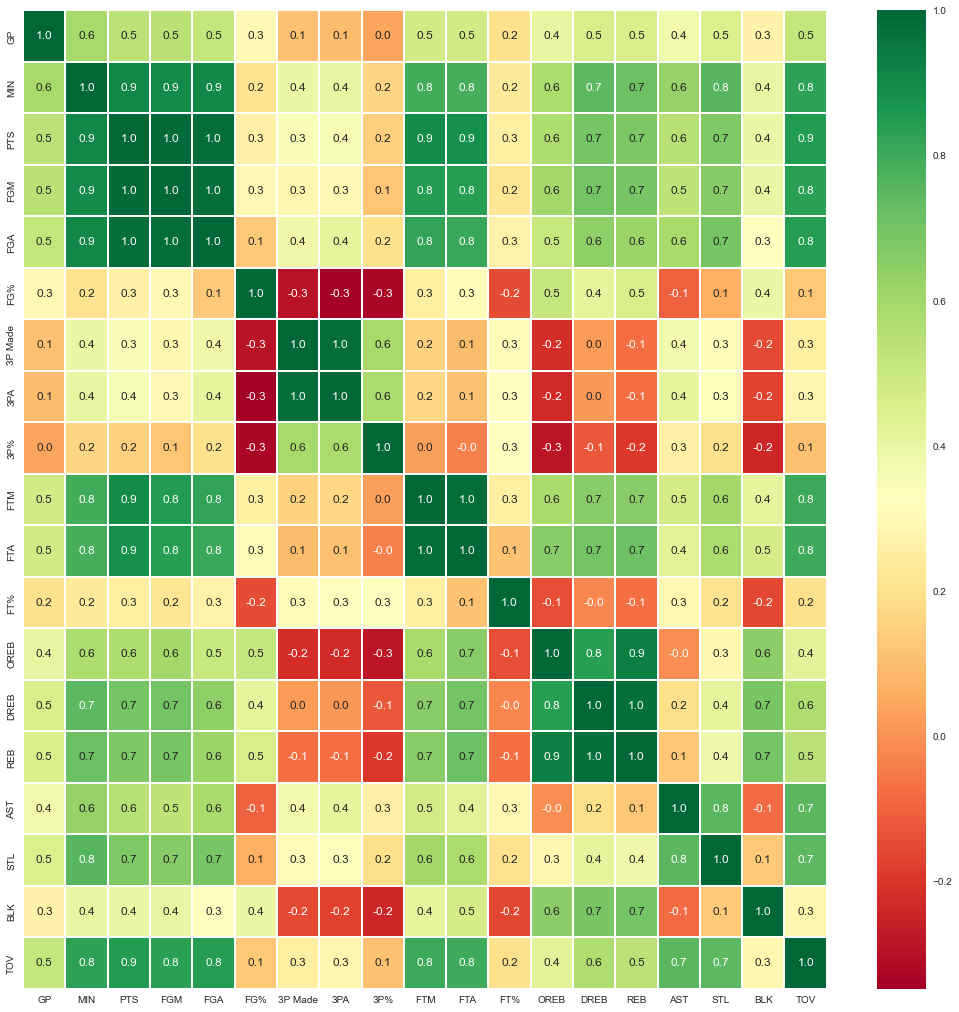

In [16]:
#check correlated features
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot = True, linewidth = 2, fmt = '.1f',cmap='RdYlGn');


In [17]:
# Create a function to return the correlated columns to be excluded from the features

def exclude_feature(dataset, threshold=0.9):
    
    corr_matrix = dataset.corr()
    m = corr_matrix.shape[0]
    dependent_feature_limit = 1 # to be adjusted according to the number of feature.
    
    excluded_features = set()
    
    for i in range(m):
        counter = 0
        for j in range(m):
            if abs(corr_matrix.iloc[i,j]) >= threshold :
                counter += 1
        if counter > dependent_feature_limit :
            excluded_features.add(corr_matrix.index[i])
    
    
    return excluded_features
            
    
    
    
    

In [18]:
excluded_features = exclude_feature(X,0.9)
excluded_features

{'3P Made',
 '3PA',
 'DREB',
 'FGA',
 'FGM',
 'FTA',
 'FTM',
 'MIN',
 'OREB',
 'PTS',
 'REB'}

In [19]:
# Remove the Corrlated Columns from the data set to avoid overfitting.
X = X.drop(excluded_features, axis=1)
X

,GP,FG%,3P%,FT%,AST,STL,BLK,TOV
0,36,34.7,25.0,69.9,1.9,0.4,0.4,1.3
1,35,29.6,23.5,76.5,3.7,1.1,0.5,1.6
2,74,42.2,24.4,67.0,1.0,0.5,0.3,1.0
3,58,42.6,22.6,68.9,0.8,0.6,0.1,1.0
4,48,52.4,0.0,67.4,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...
1335,80,43.3,14.3,79.2,2.5,0.6,0.2,0.8
1336,68,35.8,16.7,79.4,2.3,0.8,0.0,1.3
1337,43,55.0,0.0,64.3,0.3,0.3,0.4,0.9
1338,52,43.9,10.0,62.5,2.2,0.4,0.1,0.8


In [20]:
#Train and Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

"""
stratify=y : this parametere is important to split the dataset into train and test sets in a way
that preserves the same proportions of examples in each class as observed in the original dataset.

""";

In [21]:
clf = LogisticRegression(multi_class='auto',solver="liblinear")

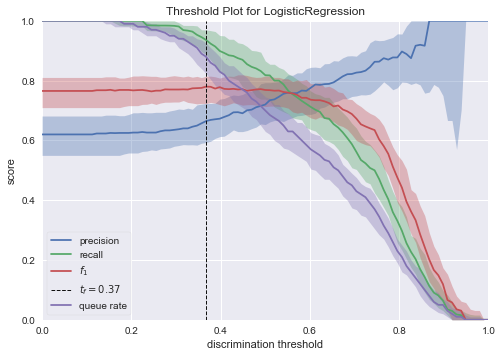

In [22]:
#Discrimination threshold plot 

viz = DiscriminationThreshold(clf)
viz.fit(X_train,y_train)
viz.show();


In [23]:
#fit the logistic regression
clf.fit(X_train,y_train);

In [24]:
# labels prediction
y_pred = np.where(clf.predict_proba(X_test)[:,1]>0.39,1,0)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [25]:
#F1_Score
f1_score(y_test,y_pred)

0.7967145790554415

In [26]:
#Confusion matrix 
confusion_matrix(y_test,y_pred)

array([[ 40,  86],
       [ 13, 194]], dtype=int64)

In [27]:
#Confusion matrix 
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(f'True Negative: {tn}')
print(f'Fasle Negative: {fn}')
print(f'True Positive: {tp}')
print(f'False Positive: {fp}')

True Negative: 40
Fasle Negative: 13
True Positive: 194
False Positive: 86


In [28]:
#test accuracy
accuracy_score(y_test, y_pred)

0.7027027027027027

In [29]:
#precision score
precision_score(y_test, y_pred)

0.6928571428571428

In [30]:
#recall score
recall_score(y_test, y_pred)

0.9371980676328503